In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:

tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
# in_list = deephoyer_comp
def comp_to_sps(in_list):
    sps = 100 - (1/np.array(in_list) * 100)
    sps = list(sps)
    return sps

# comp_to_sps(in_list)
comp_to_sps([5])

[80.0]

In [4]:
Res50Param = 25636712
Res50Param

25636712

In [8]:
gsp_acc = [73.72, 73.5]
gsp_acc_dr = list(75.70 - np.array([75.20, 73.19, 71.08]))
gsp_sps = [85, 90]

In [9]:
# DeepHoyer Imagenet
deephoyer_acc = [75.20, 73.19, 71.08]
deephoyer_acc_dr = list(76.15 - np.array([75.20, 73.19, 71.08]))
deephoyer_comp = [3.09, 4.68, 5.48]
deephoyer_sps = comp_to_sps(deephoyer_comp)
deephoyer_sps

[67.63754045307442, 78.63247863247864, 81.75182481751824]

In [10]:
# NISP Filter Pruning
nisp_acc_dr = [0.21, 0.89]
nisp_sps = [27.12, 43.82]

In [11]:
# SNIP
snip_acc = [73.95, 69.67, 61.97]
snip_acc_dr = list(75.70 - np.array(snip_acc))
snip_sps = [60, 80, 90]

In [12]:
#GraSP
grasp_acc = [74.02, 72.06, 68.14]
grasp_acc_dr = list(75.70 - np.array(grasp_acc))
grasp_sps = [60, 80, 90]

In [13]:
# Data Driven Sparse NN Huang 2018


In [14]:
# Magnitude
mag_acc = [71.7, 66.7]
mag_acc_dr = list(75.70 - np.array(grasp_acc))
mag_sps = [78.5, 89.3]

In [15]:
# ThiNet A Filter Level Pruning Method for Deep Neural Network Compression
thinet_acc = [72.04, 71.01, 68.42]
thinet_acc_dr =  list(72.88- np.array(thinet_acc))
thinet_comp = [1.58, 2.26, 3.51]
thinet_sps = list( (1 - np.array([16.94, 12.38, 8.66]) / 25.56 ) * 100)
thinet_sps

[33.72456964006258, 51.56494522691706, 66.1189358372457]

In [16]:
(73.8+83.2)/2

78.5

In [17]:
# SYNFLOW
synflow_acc = [72, 70.8, 68]
synflow_acc_dr =  list(76.80- np.array(synflow_acc))
synflow_comp = ''
synflow_sps = [78.5, 83.2, 89.3 ]
synflow_sps


[78.5, 83.2, 89.3]

In [18]:
# gsp = ('GSP', gsp_acc, gsp_acc_dr)
amc_acc = ['76.11']
amc_acc_dr = ['0.02']
amc_sps = ['80.0']

In [22]:
methods = ['GSP', 'SynFlow', 'Magnitude', 'DeepHoyer', 'SNIP', 'GraSP', 'ThiNet', 'AMC']

acc_vec = gsp_acc + synflow_acc + mag_acc + deephoyer_acc + snip_acc + grasp_acc + thinet_acc \
          + amc_acc#+ nisp_acc
acc_dr_vec = gsp_acc_dr + synflow_acc_dr + mag_acc_dr + deephoyer_acc_dr + snip_acc_dr + \
            grasp_acc_dr + thinet_acc_dr + amc_acc_dr
            # + nisp_acc_dr

sps_vec = gsp_sps + synflow_sps + mag_sps + deephoyer_sps + snip_sps + grasp_sps + thinet_sps \
          + amc_sps

len_data = [len(gsp_acc), len(synflow_acc), len(mag_acc), len(deephoyer_acc), len(snip_acc), 
          len(grasp_acc), len(thinet_acc), len(amc_acc)]

methods_l = list()
for num, name in zip(len_data, methods) :
     methods_l += [name] * num 

# methods_l

TypeError: can't multiply sequence by non-int of type 'list'

In [20]:
imagenet = {
    'Accuracy %': acc_vec,
    'Sparsity %': sps_vec,
    'Methods': methods_l
    }

In [21]:
df = pd.DataFrame(imagenet)
df.head()

ValueError: All arrays must be of the same length

In [32]:
plt.style.use('seaborn')

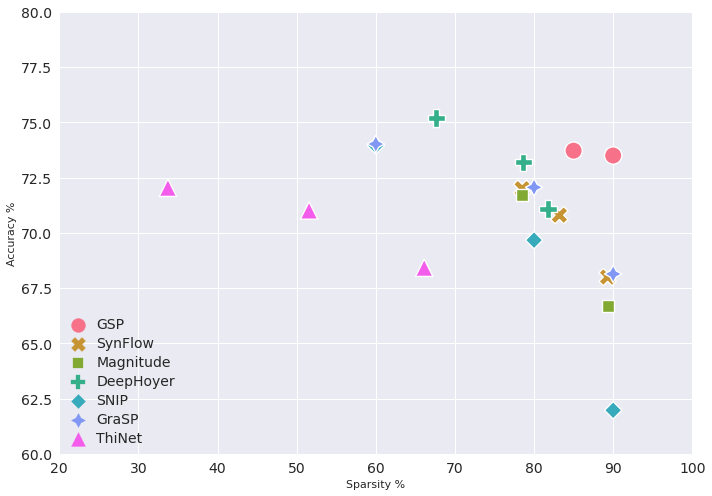

In [33]:
# plt.figure(figsize=(10,7))
fig, ax = plt.subplots(figsize=(10, 7))

ax = sns.scatterplot(data=df, x="Sparsity %", y="Accuracy %", hue="Methods", style="Methods", 
                        s=300)


plt.grid(True)
plt.xlim([20, 100])
plt.ylim([60, 80])


ax.tick_params(axis='both', which='major', labelsize=14)

# plt.title('Accuracy vs Sparsity of GSP and Concurrent Pruning methods on Imagenet', fontsize=16)
# plt.setp(ax.get_legend().get_title(), fontsize='32') # for legend title

ax.legend(loc='lower left', markerscale=2)
plt.setp(ax.get_legend().get_texts(), fontsize='14') # for legend text


plt.rcParams["axes.labelsize"] = 15


fig.tight_layout()
plt.savefig('imagenet.eps', format='eps')